In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def rotate_points(points, angle_x, angle_y, angle_z):
    # Convert angles from degrees to radians
    angle_x = np.radians(angle_x)
    angle_y = np.radians(angle_y)
    angle_z = np.radians(angle_z)

    # Create rotation matrices
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(angle_x), -np.sin(angle_x)],
        [0, np.sin(angle_x), np.cos(angle_x)]
    ])

    Ry = np.array([
        [np.cos(angle_y), 0, np.sin(angle_y)],
        [0, 1, 0],
        [-np.sin(angle_y), 0, np.cos(angle_y)]
    ])

    Rz = np.array([
        [np.cos(angle_z), -np.sin(angle_z), 0],
        [np.sin(angle_z), np.cos(angle_z), 0],
        [0, 0, 1]
    ])

    # Rotate points
    rotated_points = points @ Rx @ Ry @ Rz

    return rotated_points


In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d(points, angle_x, angle_y, angle_z):
    # Create a figure and a 3D axes object
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Rotate points
    points = rotate_points(points, angle_x, angle_y, angle_z)

    # Extract the x, y, and z coordinates from the 3D array
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]

    # Plot the points as a scatter plot
    ax.scatter(x, y, z, s=1)

    # Hide labels and axes
    plt.axis('off')
    
    return fig, ax


Processing chair
Processing airplane


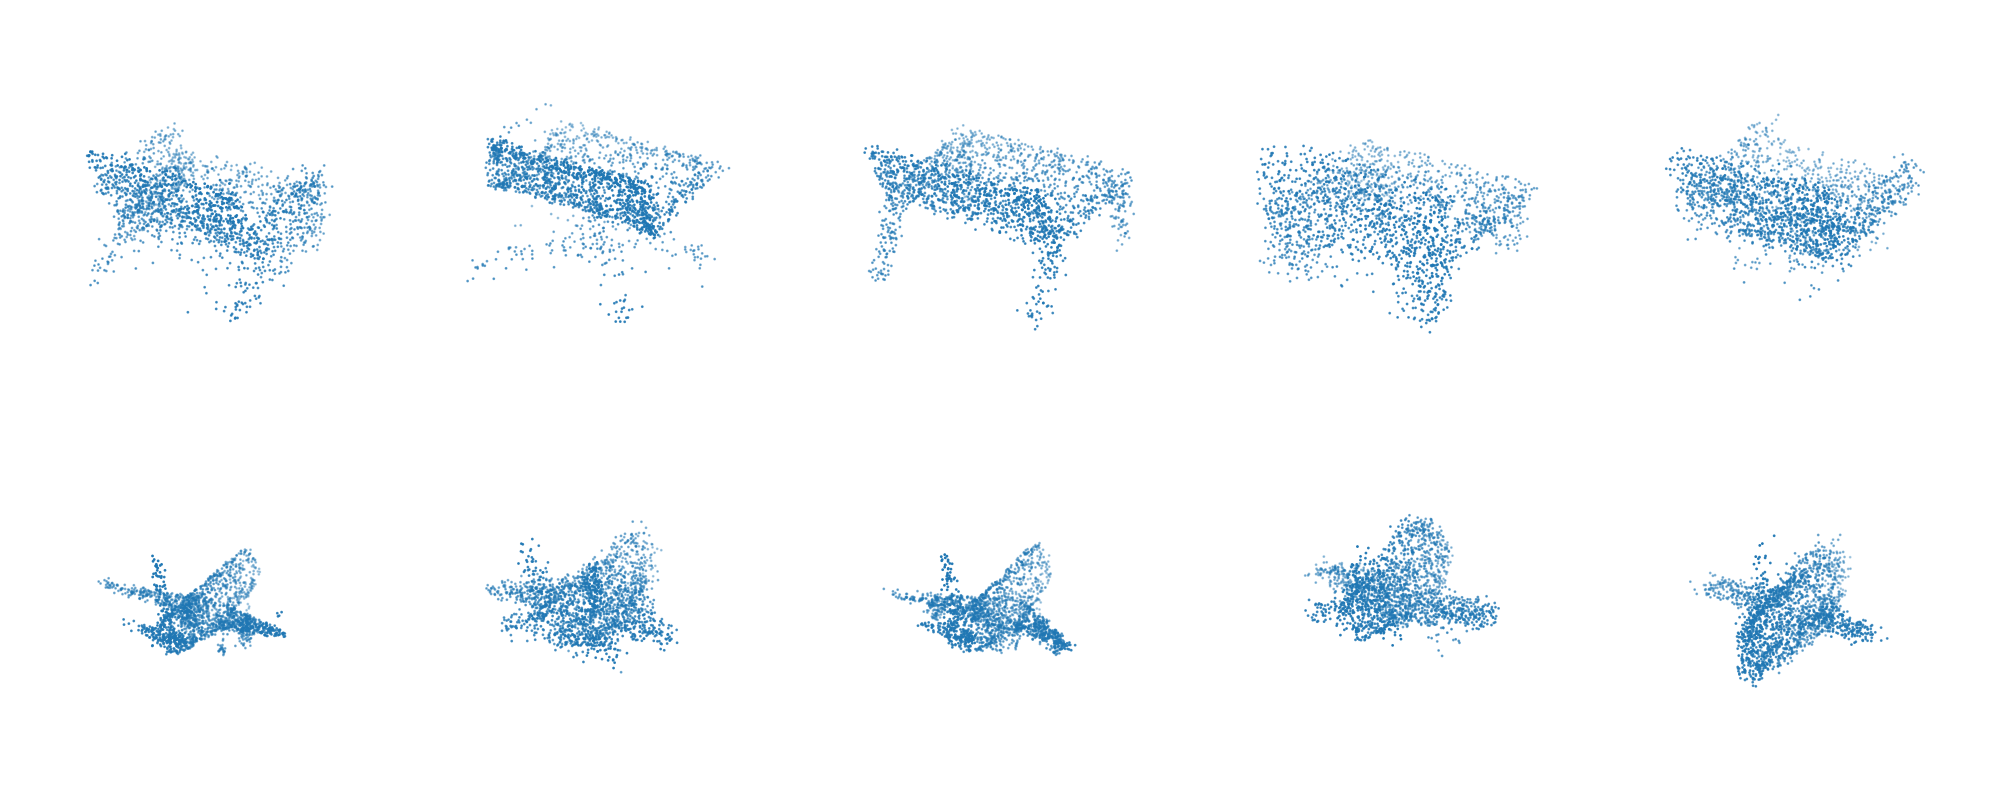

In [56]:
n_objects = 5
point_file_paths = {
    "chair": "results/GEN_Ours_airplane_1683745995/out.npy",
    "airplane": "results/GEN_Ours_airplane_1683744152/out.npy"
}

nrows = len(point_file_paths)
ncols = n_objects

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 4*nrows), subplot_kw={"projection":'3d'})

for class_idx, (class_name, file_path) in enumerate(point_file_paths.items()):
    print(f"Processing {class_name}")
    out = np.load(file_path)
    for obj_idx in range(n_objects):
        points = out[obj_idx]
        points = rotate_points(points, -90, 0, 0)
        # Extract the x, y, and z coordinates from the 3D array
        x = points[:, 0]
        y = points[:, 1]
        z = points[:, 2]
        # Plot the points as a scatter plot
        axes[class_idx][obj_idx].scatter(x, y, z, s=1)
        axes[class_idx][obj_idx].set_axis_off()
        
plt.tight_layout()
fig.savefig("figures/examples.pdf")
plt.show()

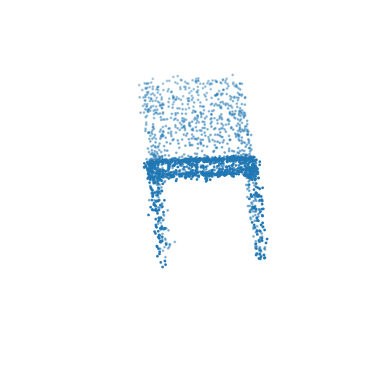

In [126]:
out = np.load(point_file_paths["chair"])
points = out[2]
fig, ax = visualize_3d(points, *(-120, -5, -210))
plt.show()

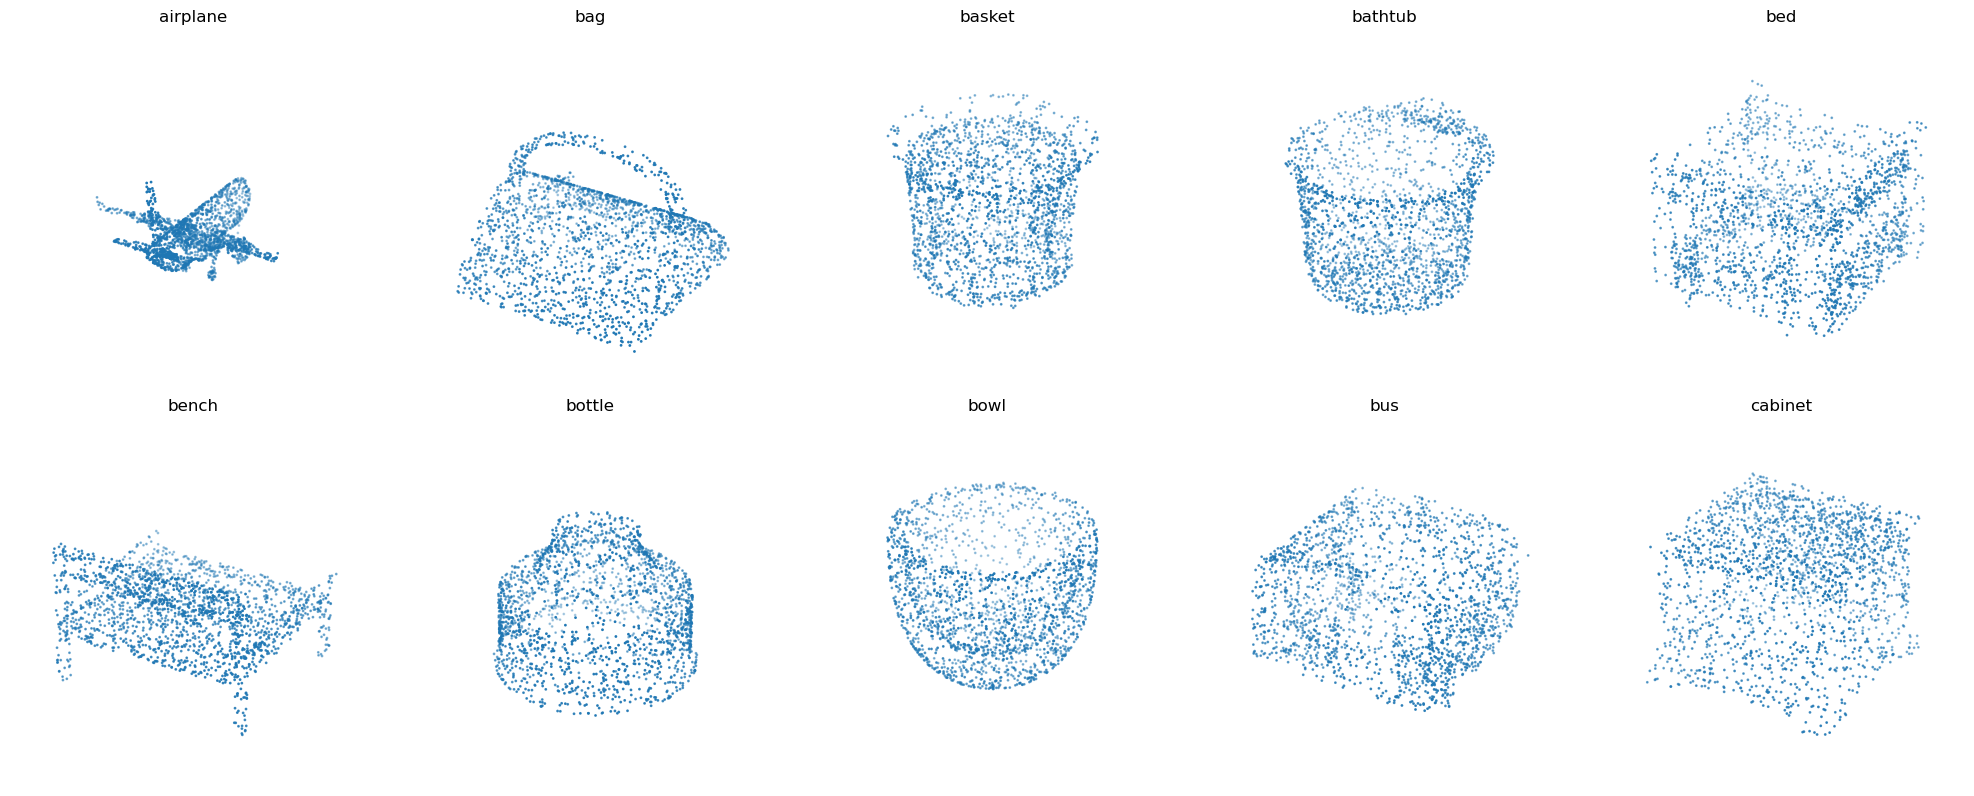

In [23]:
# visualizing dataset Shapenet
from utils.dataset import synsetid_to_cate, ShapeNetCore

n_rows = 2
n_cols = 5

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4*n_cols, 4*n_rows), subplot_kw={"projection":'3d'})
axes = axes.ravel()

cats = synsetid_to_cate.values()
cats = list(cats)[:10]

for ax_idx, cat in enumerate(cats):
    dset = ShapeNetCore(
        path="/data/dongyin/diffusion-point-cloud/data/shapenet.hdf5",
        cates=[cat],
        split='train',
        scale_mode='shape_unit'
    )

    points = dset[0]['pointcloud']
    points = rotate_points(points, -90, 0, 0)
    # Extract the x, y, and z coordinates from the 3D array
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]

    # Plot the points as a scatter plot
    axes[ax_idx].scatter(x, y, z, s=1)

    axes[ax_idx].set_title(cat)

    axes[ax_idx].set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("figures/shapenet_viz.pdf")

In [37]:
cats = list(synsetid_to_cate.values())

means = []
stds = []

for idx, cat in enumerate(cats):
    dset = ShapeNetCore(
        path="/data/dongyin/diffusion-point-cloud/data/shapenet.hdf5",
        cates=[cat],
        split='train',
        scale_mode='shape_unit'
    )
    stats= dset.get_statistics()
    means.append(stats["mean"].numpy())
    stds.append(stats["std"].numpy())

dists = [np.linalg.norm(mu) for mu in means]


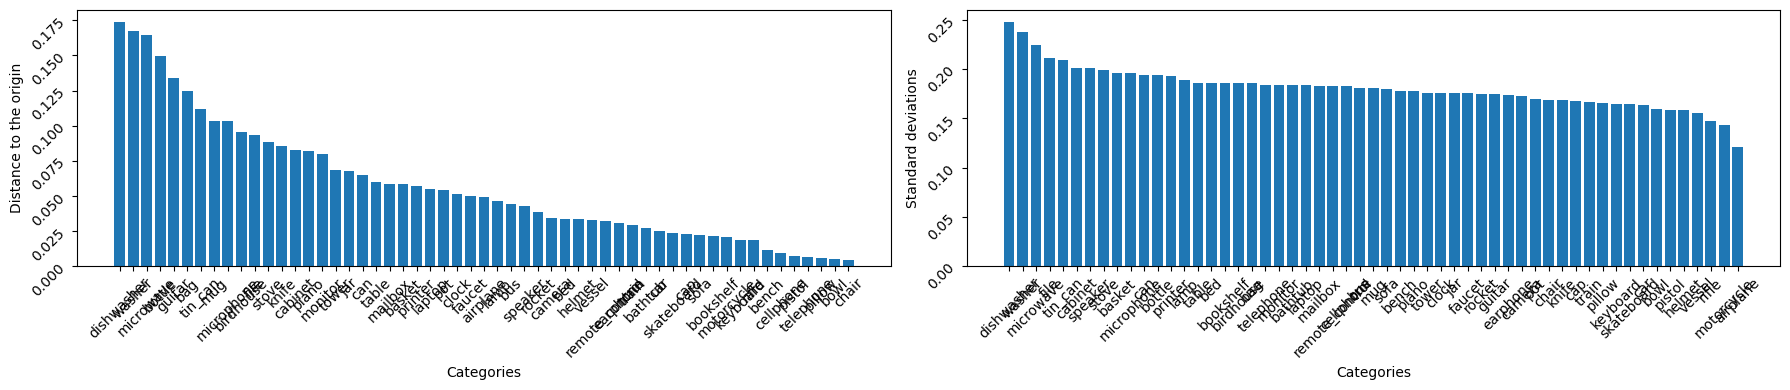

In [52]:
fig, axes = plt.subplots(ncols=2, figsize=(9*2, 4))

cats = np.array(cats)
dists = np.array(dists)
stds = np.array(stds)

dists_idx = np.argsort(dists)[::-1]
axes[0].bar(range(len(cats)), dists[dists_idx])
axes[0].set_xlabel("Categories")
axes[0].set_ylabel("Distance to the origin")
axes[0].set_xticks(range(len(cats)), cats[dists_idx])
axes[0].tick_params(labelrotation=45)

std_idx = np.argsort(stds)[::-1]
axes[1].bar(range(len(cats)), stds[std_idx])
axes[1].set_xlabel("Categories")
axes[1].set_ylabel("Standard deviations")
axes[1].set_xticks(range(len(cats)), cats[std_idx])
axes[1].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()
fig.savefig("figures/std_distance.pdf")

In [54]:
print(cats[std_idx])
print(cats[dists_idx])

['dishwasher' 'washer' 'microwave' 'file' 'tin_can' 'cabinet' 'speaker'
 'stove' 'basket' 'microphone' 'can' 'bottle' 'printer' 'lamp' 'table'
 'bed' 'bookshelf' 'birdhouse' 'bag' 'telephone' 'monitor' 'bathtub'
 'laptop' 'mailbox' 'remote_control' 'cellphone' 'bus' 'mug' 'sofa'
 'bench' 'piano' 'tower' 'clock' 'jar' 'faucet' 'rocket' 'guitar'
 'earphone' 'camera' 'pot' 'chair' 'knife' 'cap' 'train' 'pillow'
 'keyboard' 'skateboard' 'car' 'bowl' 'pistol' 'helmet' 'vessel' 'rifle'
 'motorcycle' 'airplane']
['dishwasher' 'washer' 'microwave' 'bottle' 'guitar' 'bag' 'tin_can' 'mug'
 'microphone' 'birdhouse' 'file' 'stove' 'knife' 'cabinet' 'piano'
 'monitor' 'tower' 'jar' 'can' 'table' 'mailbox' 'basket' 'printer'
 'laptop' 'pot' 'clock' 'faucet' 'airplane' 'lamp' 'bus' 'speaker'
 'rocket' 'camera' 'bed' 'helmet' 'vessel' 'remote_control' 'earphone'
 'train' 'bathtub' 'car' 'skateboard' 'cap' 'sofa' 'bookshelf'
 'motorcycle' 'keyboard' 'rifle' 'bench' 'cellphone' 'pistol' 'telephone'
 'pi